### What is a classification in machine learning ? ###

In machine learning, classification is a supervised learning concept which basically categorizes a set of data into classes.

### LOGİSTİC REGRESSİON ###

Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as plt

In [3]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

In [4]:
df=pd.read_csv('Breast_cancer_data.csv')

In [5]:
df.shape

(569, 6)

In [6]:
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [11]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


In [13]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [14]:
y=df['diagnosis']

In [15]:
X=df.loc[:,df.columns!='diagnosis']

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 5) (114, 5) (455,) (114,)


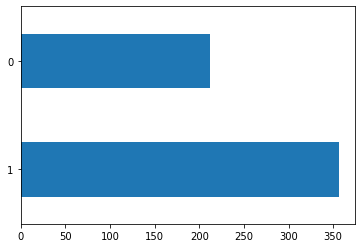

In [18]:
df['diagnosis'].value_counts().plot.barh();

for all data set, not split data set like X_test,y_test,....

CREATE A MODEL 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model_log=LogisticRegression(solver='liblinear').fit(X,y)

In [21]:
model_log.coef_

array([[ 4.90109941, -0.17717236, -0.54757242, -0.02493594, -0.51062221]])

In [22]:
model_log.intercept_

array([0.76181778])

PREDİCT

In [23]:
y_predict=model_log.predict(X)
y_predict[:5]

array([0, 0, 0, 1, 0], dtype=int64)

'predict_proba()' gives us the probability of yes or no.First index is probability of 'no' and second index is probabiliy of 'yes'

In [24]:
model_log.predict_proba(X)

array([[9.94345739e-01, 5.65426149e-03],
       [9.99419834e-01, 5.80166056e-04],
       [9.99564577e-01, 4.35422993e-04],
       ...,
       [9.73344034e-01, 2.66559659e-02],
       [9.99992428e-01, 7.57230200e-06],
       [2.49262732e-02, 9.75073727e-01]])

In [25]:
y_proba=model_log.predict_proba(X)[:,1]
y_proba[:5]

array([5.65426149e-03, 5.80166056e-04, 4.35422993e-04, 7.19181170e-01,
       1.65614036e-04])

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [114]:
confusion_matrix(y, y_predict)

array([[177,  35],
       [ 16, 341]], dtype=int64)

In [115]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       212
           1       0.91      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.90      0.90       569
weighted avg       0.91      0.91      0.91       569



In [116]:
accuracy_score(y, y_predict)

0.9103690685413005

#### Describe a threshold value ####

In [117]:
y_predict=[1 if i>0.5 else 0 for i in y_proba]

In [118]:
y_predict[0:5]

[0, 0, 0, 1, 0]

#### ROC AUC-CURVE ####

In [119]:
from sklearn.metrics import roc_auc_score, roc_curve

In [120]:
model_log_roc=roc_auc_score(y, model_log.predict(X))
model_log_roc

0.8950438666032452

In [121]:
fpr, tpr, threshold=roc_curve(y, model_log.predict_proba(X)[:,1])

VALIDATION

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 5) (114, 5) (455,) (114,)


In [124]:
model_log_split=LogisticRegression(solver='liblinear').fit(X_train,y_train)

####  with Holdout Method ####

not validation 

In [125]:
accuracy_score(y_test, model_log_split.predict(X_test))

0.9385964912280702

#### with Cross Validation ####

In [126]:
cross_val_score(model_log_split, X_test, y_test, cv=10)

array([0.91666667, 1.        , 0.91666667, 0.83333333, 1.        ,
       0.72727273, 0.90909091, 0.90909091, 0.81818182, 0.90909091])

In [127]:
cross_val_score(model_log_split, X_test, y_test, cv=10).mean()

0.8939393939393938

### Naive Bayes ###

Naïve Bayes is one of the fast and easy ML algorithms to predict a class of datasets. It can be used for Binary as well as Multi-class Classifications. It performs well in Multi-class predictions as compared to the other Algorithms. It is the most popular choice for text classification problems.

In [128]:
from sklearn.naive_bayes import GaussianNB

MODEL

In [129]:
model_naive=GaussianNB().fit(X_train, y_train)

PREDİCT

In [130]:
y_predict=model_naive.predict(X_test)

Test Error Value

In [131]:
accuracy_score(y_test, y_predict)

0.9385964912280702

VALIDATION

In [132]:
cross_val_score(model_naive, X_test, y_test, cv=10)

array([0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ,
       0.81818182, 0.90909091, 0.90909091, 0.81818182, 1.        ])

In [133]:
cross_val_score(model_naive, X_test, y_test, cv=10).mean()

0.9204545454545455

### KNN for classification - K-NEAREST NEIGHBOR ###

MODEL

In [134]:

from sklearn.neighbors import KNeighborsClassifier

In [135]:
model_knn=KNeighborsClassifier().fit(X_train, y_train)

PREDİCT

In [136]:
y_predict=model_knn.predict(X_test)
y_predict[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [137]:
accuracy_score(y_test, y_predict)

0.9385964912280702

MODEL TUNİNG

In [138]:
knn_parametres={'n_neighbors':np.arange(1,15)}

In [139]:
knn_model_cv=GridSearchCV(KNeighborsClassifier(), knn_parametres, cv=10).fit(X_train, y_train)

In [140]:
knn_model_cv.best_score_

0.8833333333333334

In [141]:
knn_model_cv.best_params_

{'n_neighbors': 9}

FINALLY MODEL

In [142]:
finally_model=KNeighborsClassifier(11).fit(X_train, y_train)

In [143]:
y_predict=finally_model.predict(X_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [144]:
accuracy_score(y_test, y_predict)

0.9298245614035088

### SUPPORT VECTOR MACHINE for classification ###

In [145]:
from sklearn.svm import SVR

MODEL

In [146]:
model_svm=SVR(kernel='linear').fit(X_train, y_train)

PREDİCT

In [147]:
y_predict=model_svm.predict(X_test)

TUNİNG

In [148]:
svm_param={'C': np.arange(1,5)}

MODEL

In [150]:
model_svm_cv=GridSearchCV(SVR(kernel='linear'), svm_param, cv=10, n_jobs=1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ................................................C=1; total time=  21.4s
[CV] END ................................................C=1; total time=  22.3s
[CV] END ................................................C=1; total time=  38.2s
[CV] END ................................................C=1; total time=  58.8s
[CV] END ................................................C=1; total time=  40.9s
[CV] END ................................................C=1; total time= 1.1min
[CV] END ................................................C=1; total time=  59.2s
[CV] END ................................................C=1; total time= 1.4min
[CV] END ................................................C=1; total time=  59.5s
[CV] END ................................................C=1; total time= 1.1min
[CV] END ................................................C=2; total time= 1.5min
[CV] END .......................................

In [151]:
model_svm_cv.best_params_

{'C': 1}

In [152]:
finally_model=SVM(kernel='linear', C=svm_param).fit(X_train, y_train)

NameError: name 'SVM' is not defined

In [ ]:
finally_model_predict=finally_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

#### Radial Basis Function ####

In [ ]:
svm_model=SVM().fit(X_train, y_train)

In [ ]:
y_predict=svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

TUNİNG

In [ ]:
svm_param={'C':np.arange(1,5), 'gamma':arange(1,5)}

In [ ]:
svr_model_cv=GridSearchCV(SVM(), svm_param, cv=10, n_jobs=1, verbose=2).fit(X_train, y_train)

In [ ]:
svr_model_cv.best_params_

FINALLY MODEL

In [ ]:
finally_model=SVR(C=5, gamma=1).fit(X_train, y_train)

In [ ]:
y_predict=finally_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

### ARTIFICIAL NEURAL NETWORKS ###

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassificer

ImportError: cannot import name 'MLPClassificer' from 'sklearn.neural_network' (c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\__init__.py)

In [ ]:
X_train_scale=StandardScaler().fit_transform(X_train)
X_train_scale[:5]

In [ ]:
X_test_scale=StandardScaler().fit_transform(X_test)
X_test_scale[:5]

MODEL

In [ ]:
model_mlpc=MLPClassificer().fit(X_train_scale, y_train)

In [ ]:
model_mlpc.best_params_

PREDICT

In [ ]:
y_predict=model_mlpc.predict(X_test_scale)

In [ ]:
accuracy_score(y_test, y_predict)

In [ ]:
dir(MLPClassificer)

TUNİNG

In [153]:
mlpc_param={'alpha':[0.0001,0.001,0.01,0.5], 'hidden_layers_size':[(10,100),(5,100),(100,1000,1000)], 'solver':['adam','lbfgs']}

In [154]:
model_mlpc_cv=GridSearchCV(MLPClassificer(), mlpc_param, cv=10, n_jobs=-1, verbose=2).fit(X_train_scale, y_train)

NameError: name 'MLPClassificer' is not defined

In [156]:
model_mlpc_cv.best_params_

NameError: name 'model_mlpc_cv' is not defined

In [157]:
finally_model=MLPClassificer(alpha=0.01, hidden_layers_size=(10,100), solver=lbfgs)

NameError: name 'MLPClassificer' is not defined

In [158]:
y_predict=finally_model.predict(X_test_scale)

In [159]:
accuracy_score(y_test, y_predict)

0.6228070175438597

### CLASSIFICATION AND REGRESSION for classification ###

In [161]:
X[:5]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [162]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [163]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [164]:
from sklearn.tree import DecisionTreeClassifier

MODEL

In [166]:
model_cart=DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

PREDICT

In [172]:
!pip install skompiler


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [180]:
pip install astor


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
from skompiler import skompile

In [182]:
print(skompile(model_cart.predict).to('python/code'))

((1 if x[2] <= 85.25 else 1) if x[2] <= 98.43000030517578 else 0 if x[1] <=
    16.394999504089355 else 0)



In [210]:
x=[1,2,4,5,6]

In [211]:
((1 if x[2] <= 85.25 else 1) if x[2] <= 98.43000030517578 else 0 if x[1] <=
    16.394999504089355 else 0)

1

In [212]:
y_predict=model_cart.predict(X_test)

In [213]:
accuracy_score(y_test, y_predict)

0.9210526315789473

TUNİNG

In [214]:
cart_param={'max_depth':np.arange(1,5)}

In [219]:
model_cart_cv=GridSearchCV(DecisionTreeClassifier(), cart_param, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [217]:
model_cart_cv.best_params_

{'max_depth': 4}

In [221]:
finally_model=DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [223]:
y_predict=finally_model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [224]:
accuracy_score(y_test, y_predict)

0.9122807017543859

### RANDOM FORESTS for classifition ###

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in Python.

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
model_random=RandomForestClassifier().fit(X_train, y_train)

PREDICT

In [227]:
y_predict=model_random.predict(X_test)

In [228]:
accuracy_score(y_test, y_predict)

0.956140350877193

TUNİNG

In [229]:
model_random_param={'max_depth':[2,5,10],'max_features':[2,5,10], 'min_samples_split':[2,5,10], 'n_estimators':[2,5,10]}

In [231]:
model_random_cv=GridSearchCV(RandomForestClassifier(), model_random_param, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.8768599  0.87458937 0.87227053 0.87024155 0.8768599  0.88560386
 0.87676329 0.88111111 0.87454106 0.87236715 0.88111111 0.87676329
 0.86772947 0.87222222 0.87231884 0.87009662 0.87671498 0.88772947
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.88768116 0.91198068 0.90289855
 0.88777778 0.9031401  0.90966184 0.89207729 0.90753623 0.90101449
 0.88753623 0.89434783 0.9052657  0.8810628  0.90309179 0.89415459
 0.90294686 0.9052657  0.89637681        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.85903382 0.90521739 0.89647343 0.88111111 0.90758454 0.91183575
 0.88338164 0.90541063 0.9052657  0.86811594 0.89444444 0.90096618
 0.87463768 0.87681159 0.89207729 0.88091787 0.90318841 0.9031401
        nan        nan 

In [232]:
model_random_cv.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 5}

FINALLY MODEL

In [234]:
finally_model=RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=2, n_estimators=5).fit(X_train, y_train)

In [236]:
y_predict=finally_model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [237]:
accuracy_score(y_test, y_predict)

0.9210526315789473

#### Importance of the feautures ####

In [238]:
imp=pd.DataFrame({'importance':finally_model.feature_importances_*100},index=X_train.columns)

In [239]:
imp.sort_values(by='importance', axis=0, ascending=True)

,importance
mean_smoothness,10.774482
mean_texture,15.466339
mean_perimeter,18.787275
mean_radius,23.180282
mean_area,31.791622


### GRADİENT BOOSTİNG MACHINES - GBM ###

Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual.

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 5) (114, 5) (455,) (114,)


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

MODEL

In [32]:
model_gbm=GradientBoostingClassifier().fit(X_train, y_train)

In [33]:
y_predict=model_gbm.predict(X_test)

In [34]:
accuracy_score(y_test, y_predict)

0.9473684210526315

TUNİNG

In [48]:
gbm_param={'learning_rate':[0.005, 0.01, 0.1], 'max_depth':[2,4,5], 'min_samples_split':[2,4,5]}

In [49]:
model_gbm_cv=GridSearchCV(GradientBoostingClassifier(), gbm_param, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [51]:
model_gbm_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2}

In [52]:
finally_model=GradientBoostingClassifier(learning_rate=0.1, max_depth=2, min_samples_split=2).fit(X_train, y_train)

In [54]:
y_predict=finally_model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [55]:
accuracy_score(y_test, y_predict)

0.9473684210526315

### XGBoost - EXTREME GRADİENT BOOSTİNG ###

During training, XGBoost uses parallel computation to build trees across all CPUs. The ‘max depth’ option is used in place of the conventional stopping criteria (i.e., criterion first), and tree pruning is initiated from the backward direction. This greatly enhances XGBoost’s computational efficiency and speed compared to competing GBM frameworks.

In [57]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier

MODEL

In [59]:
model_xgboost=XGBClassifier().fit(X_train, y_train)

PREDICT

In [62]:
y_predict=model_xgboost.predict(X_test)
y_predict[:5]

array([1, 0, 0, 1, 1])

TUNİNG

In [64]:
xgboost_param={'learning_rate':[0.005, 0.01, 0.1], 'max_depth':[2,4,5], 'min_samples_split':[2,4,5], 'n_estimators':[100,500,1000], 'subsample':[0.5,0.6,0.8]}

In [74]:
model_xgboost_cv=GridSearchCV(XGBClassifier(), xgboost_param, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[17:58:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [75]:
model_xgboost_cv.best_params_

{'learning_rate': 0.005,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.5}

In [ ]:
finally_model=XGBClassifier(learning_rate= , max_depth= , min_samples_split= , n_estimators= , subsample= )

In [ ]:
y_predict=finally_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

### LIGHT GBM ###

LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.It is more efficient than XGBoost. 

In [68]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 1.8 MB/s eta 0:00:00


In [69]:
from lightgbm import LGBMClassifier

In [70]:
model_lgbm=LGBMClassifier().fit(X_train, y_train)

In [71]:
y_predict=model_lgbm.predict(X_test)

In [72]:
accuracy_score(y_test, y_predict)

0.9473684210526315

TUNİNG

In [73]:
lgbm_param={'learning_rate':[0.005, 0.01, 0.1], 'max_depth':[2,4,5], 'min_samples_split':[2,4,5], 'n_estimators':[100,500,1000], 'subsample':[0.4,0.5,0.6]}

In [77]:
model_lgbm_cv=GridSearchCV(LGBMClassifier(), lgbm_param, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [78]:
model_lgbm_cv.best_params_

{'learning_rate': 0.005,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.4}

In [88]:
finally_model=LGBMClassifier(learning_rate=0.005 , max_depth=4 , min_samples_split=2 , n_estimators=500 , subsample=0.04).fit(X_train, y_train)

In [89]:
y_predict=finally_model.predict(X_test)

In [90]:
accuracy_score(y_test, y_predict)

0.9649122807017544

### CATBOOST - Category Boosting ###

One of CatBoost’s core edges is its ability to integrate a variety of different data types, such as images, audio, or text features into one framework. But CatBoost also offers an idiosyncratic way of handling categorical data, requiring a minimum of categorical feature transformation, opposed to the majority of other machine learning algorithms, that cannot handle non-numeric values.

In [79]:
!pip install catboost

     ---------------------------------------- 73.9/73.9 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [80]:
from catboost import CatBoostClassifier

In [81]:
model_catboost=CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.00736
0:	learn: 0.6826586	total: 140ms	remaining: 2m 20s
1:	learn: 0.6728843	total: 143ms	remaining: 1m 11s
2:	learn: 0.6649427	total: 146ms	remaining: 48.6s
3:	learn: 0.6547012	total: 150ms	remaining: 37.3s
4:	learn: 0.6468404	total: 153ms	remaining: 30.4s
5:	learn: 0.6389717	total: 156ms	remaining: 25.8s
6:	learn: 0.6314277	total: 159ms	remaining: 22.5s
7:	learn: 0.6224676	total: 161ms	remaining: 20s
8:	learn: 0.6140927	total: 164ms	remaining: 18.1s
9:	learn: 0.6057193	total: 167ms	remaining: 16.6s
10:	learn: 0.5984300	total: 170ms	remaining: 15.3s
11:	learn: 0.5898236	total: 173ms	remaining: 14.2s
12:	learn: 0.5820843	total: 176ms	remaining: 13.4s
13:	learn: 0.5735885	total: 179ms	remaining: 12.6s
14:	learn: 0.5677302	total: 183ms	remaining: 12s
15:	learn: 0.5599525	total: 186ms	remaining: 11.4s
16:	learn: 0.5533798	total: 189ms	remaining: 10.9s
17:	learn: 0.5468297	total: 193ms	remaining: 10.6s
18:	learn: 0.5409746	total: 197ms	remaining: 10.2s
19:	learn: 0.5

In [83]:
y_predict=model_catboost.predict(X_test)

In [84]:
accuracy_score(y_test, y_predict)

0.956140350877193

TUNİNG

In [91]:
catboost_param={'learning_rate':[0.01, 0.01, 0.001], 'depth':[3,5,8], 'iterations':[200,500.1000]}

In [92]:
model_catboost_cv=GridSearchCV(CatBoostClassifier(), catboost_param, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\catboost\core.py", line 5130, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
 

0:	learn: 0.6807018	total: 3.17ms	remaining: 631ms
1:	learn: 0.6681116	total: 7.29ms	remaining: 722ms
2:	learn: 0.6568915	total: 10.2ms	remaining: 668ms
3:	learn: 0.6463871	total: 13.5ms	remaining: 662ms
4:	learn: 0.6379844	total: 16.3ms	remaining: 635ms
5:	learn: 0.6268298	total: 19.1ms	remaining: 616ms
6:	learn: 0.6159326	total: 21.8ms	remaining: 601ms
7:	learn: 0.6048738	total: 24.4ms	remaining: 586ms
8:	learn: 0.5937884	total: 27ms	remaining: 572ms
9:	learn: 0.5832610	total: 29.7ms	remaining: 564ms
10:	learn: 0.5726641	total: 32.7ms	remaining: 562ms
11:	learn: 0.5624597	total: 35.4ms	remaining: 555ms
12:	learn: 0.5536745	total: 38.2ms	remaining: 550ms
13:	learn: 0.5435933	total: 40.5ms	remaining: 538ms
14:	learn: 0.5350222	total: 43.3ms	remaining: 534ms
15:	learn: 0.5269721	total: 45.7ms	remaining: 526ms
16:	learn: 0.5181182	total: 48.3ms	remaining: 520ms
17:	learn: 0.5090729	total: 50.3ms	remaining: 509ms
18:	learn: 0.5009922	total: 52.4ms	remaining: 499ms
19:	learn: 0.4925794	tot

In [93]:
model_catboost_cv.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.01}

In [94]:
finally_model=CatBoostClassifier(depth=5, iterations=200, learning_rate=0.01).fit(X_train, y_train)

0:	learn: 0.6807018	total: 2.42ms	remaining: 481ms
1:	learn: 0.6681116	total: 4.87ms	remaining: 482ms
2:	learn: 0.6568915	total: 7.27ms	remaining: 477ms
3:	learn: 0.6463871	total: 9.63ms	remaining: 472ms
4:	learn: 0.6379844	total: 11.8ms	remaining: 460ms
5:	learn: 0.6268298	total: 13.9ms	remaining: 449ms
6:	learn: 0.6159326	total: 16.1ms	remaining: 443ms
7:	learn: 0.6048738	total: 18.2ms	remaining: 436ms
8:	learn: 0.5937884	total: 20.4ms	remaining: 432ms
9:	learn: 0.5832610	total: 22.7ms	remaining: 431ms
10:	learn: 0.5726641	total: 25ms	remaining: 430ms
11:	learn: 0.5624597	total: 27.2ms	remaining: 427ms
12:	learn: 0.5536745	total: 29.4ms	remaining: 422ms
13:	learn: 0.5435933	total: 31.4ms	remaining: 418ms
14:	learn: 0.5350222	total: 34.1ms	remaining: 420ms
15:	learn: 0.5269721	total: 36.4ms	remaining: 419ms
16:	learn: 0.5181182	total: 38.5ms	remaining: 414ms
17:	learn: 0.5090729	total: 40.7ms	remaining: 411ms
18:	learn: 0.5009922	total: 42.9ms	remaining: 409ms
19:	learn: 0.4925794	tot

In [95]:
y_predict=finally_model.predict(X_test)

In [96]:
accuracy_score(y_test, y_predict)

0.9736842105263158